In [2]:
from graphmaker import GraphMaker
import os
import numpy as np
from tensorflow.train import Feature, Features, Int64List, FloatList, BytesList, Example
import tensorflow as tf


2025-05-07 13:11:47.582187: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746637907.653272   13456 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746637907.675500   13456 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1746637907.828686   13456 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1746637907.828712   13456 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1746637907.828714   13456 computation_placer.cc:177] computation placer alr

In [2]:
def _int64_feature(value):
    return Feature(int64_list=Int64List(value=value))

def _float_feature(value):
    return Feature(float_list=FloatList(value=value))

def serialize_scene(scene_adj, tx_adj, rx_adj, tx_loc, rx_loc, prim_vertices, prim_normals, real_channel_coeff, imag_channel_coeff):
    flat_scene_adj = np.concatenate(scene_adj)
    flat_tx_adj = np.concatenate(tx_adj)
    flat_rx_adj = np.concatenate(rx_adj)
    flat_tx_loc = tx_loc.flatten()
    flat_rx_loc = rx_loc.flatten()
    flat_prim_vertices = prim_vertices.flatten()
    flat_prim_normals = prim_normals.flatten()
    flat_real_channel_coeff = real_channel_coeff.flatten()
    flat_imag_channel_coeff = imag_channel_coeff.flatten()


    scene_lengths = [len(a) for a in scene_adj]  # save original lengths
    tx_lengths = [len(a) for a in tx_adj]
    rx_lengths = [len(a) for a in rx_adj]
    num_tx = [tx_loc.shape[0]]
    num_rx = [rx_loc.shape[0]]
    num_prim = [prim_vertices.shape[0]]
    

    feature = Features(feature={
        'scene_adj_flat': _int64_feature(flat_scene_adj.tolist()),
        'scene_adj_lengths': _int64_feature(scene_lengths),
        'tx_adj_flat': _int64_feature(flat_tx_adj.tolist()),
        'tx_adj_lengths': _int64_feature(tx_lengths),
        'rx_adj_flat': _int64_feature(flat_rx_adj.tolist()),
        'rx_adj_lengths': _int64_feature(rx_lengths),
        'tx_loc': _float_feature(flat_tx_loc),
        'num_tx': _int64_feature(num_tx),
        'rx_loc': _float_feature(flat_rx_loc),
        'num_rx': _int64_feature(num_rx),
        'prim_vertices': _float_feature(flat_prim_vertices),
        'prim_normals': _float_feature(flat_prim_normals),
        'num_prim': _int64_feature(num_prim),
        'real_channel_coeff': _float_feature(flat_real_channel_coeff),
        'imag_channel_coeff': _float_feature(flat_imag_channel_coeff),
    })
    
    return Example(features=feature).SerializeToString()

In [3]:
scene_dir = "minis3"
output_dir = "slightly_incomplete_smaller"
scene_files = [f for f in os.listdir(scene_dir) if f.endswith('.xml')]
print(len(scene_files))

216


In [4]:
graphs = []
tx_graph = []
rx_graph = []
tx_pos = []
rx_pos = []
prim_vertices = []
prim_normals = []
real_channel_coeff = []
imag_channel_coeff = []


for scene_file in scene_files:
    print(scene_file)
    try:
        gm = GraphMaker(os.path.join(scene_dir, scene_file))
    except:
        print('empty scene?')
        continue

    tx_p = np.genfromtxt(fname=os.path.join(output_dir, os.path.splitext(scene_file)[0], 'tx_locations'), dtype=np.float32)
    rx_p = np.genfromtxt(fname=os.path.join(output_dir, os.path.splitext(scene_file)[0], 'rx_locations'), dtype=np.float32)
    real_cc = np.genfromtxt(fname=os.path.join(output_dir, os.path.splitext(scene_file)[0], 'real_a'), dtype=np.float32)
    imag_cc = np.genfromtxt(fname=os.path.join(output_dir, os.path.splitext(scene_file)[0], 'imaginary_a'), dtype=np.float32)
    
    pv = gm.get_vertices().cpu().numpy()
    pn = gm.face_normals.cpu().numpy()

    graphs.append(gm.calc_graph_edges())
    tx_graph.append(gm.calc_antenna_edges(tx_p))
    rx_graph.append(gm.calc_antenna_edges(rx_p))
    tx_pos.append(tx_p)
    rx_pos.append(rx_p)
    prim_vertices.append(pv)
    prim_normals.append(pn)
    real_channel_coeff.append(real_cc)
    imag_channel_coeff.append(imag_cc)


row15_col13.xml
empty scene?
row0_col4.xml
row5_col1.xml
row2_col14.xml
row7_col0.xml
row2_col5.xml
row5_col8.xml
row3_col14.xml
row5_col6.xml
row0_col1.xml
row2_col11.xml
row3_col5.xml
row8_col7.xml
row8_col2.xml
row9_col3.xml
row1_col2.xml
row4_col2.xml
row15_col10.xml
empty scene?
row5_col7.xml
row10_col8.xml
row10_col7.xml
row8_col15.xml
row8_col0.xml
row4_col9.xml
row10_col12.xml
row6_col13.xml
row7_col4.xml
row10_col13.xml
row3_col10.xml
row0_col9.xml
empty scene?
row14_col8.xml
row11_col13.xml
row5_col15.xml
row2_col3.xml
row15_col9.xml
row4_col6.xml
row5_col0.xml
row0_col0.xml
row10_col10.xml
row11_col8.xml
row1_col8.xml
row2_col1.xml
row14_col15.xml
row2_col4.xml
row0_col6.xml
empty scene?
row11_col15.xml
row7_col8.xml
row5_col9.xml
row10_col3.xml
row0_col5.xml
row8_col13.xml
row4_col10.xml
row9_col6.xml
row0_col11.xml
empty scene?
row6_col11.xml
row15_col8.xml
row4_col0.xml
row13_col13.xml
row3_col2.xml
row4_col4.xml
row1_col15.xml
row7_col7.xml
row0_col8.xml
empty scene?
row

In [ ]:
from itertools import islice

combined = list(zip(graphs, tx_graph, rx_graph, tx_pos, rx_pos, prim_vertices, prim_normals, real_channel_coeff, imag_channel_coeff))

train, validation, test = 140, 170, 202

# with tf.io.TFRecordWriter('train.tfrecord') as writer:
#     for c in islice(combined, train):
#         s = serialize_scene(*c)
#         writer.write(s)

# with tf.io.TFRecordWriter('validation.tfrecord') as writer:
#     for c in islice(combined, train, validation):
#         s = serialize_scene(*c)
#         writer.write(s)

# with tf.io.TFRecordWriter('test.tfrecord') as writer:
#     for c in islice(combined, validation, test):
#         s = serialize_scene(*c)
#         writer.write(s)

with tf.io.TFRecordWriter('train.tfrecord') as writer:
    for c in combined[:train]:
        s = serialize_scene(*c)
        writer.write(s)

with tf.io.TFRecordWriter('validation.tfrecord') as writer:
    for c in combined[train:validation]:
        s = serialize_scene(*c)
        writer.write(s)

with tf.io.TFRecordWriter('test.tfrecord') as writer:
    for c in combined[validation:]:
        s = serialize_scene(*c)
        writer.write(s)
        

In [31]:
feature_description = {
    'scene_adj_flat': tf.io.FixedLenSequenceFeature([], tf.int64, allow_missing=True),
    'scene_adj_lengths': tf.io.FixedLenSequenceFeature([], tf.int64, allow_missing=True),
    'tx_adj_flat': tf.io.FixedLenSequenceFeature([], tf.int64, allow_missing=True),
    'tx_adj_lengths': tf.io.FixedLenSequenceFeature([], tf.int64, allow_missing=True),
    'rx_adj_flat': tf.io.FixedLenSequenceFeature([], tf.int64, allow_missing=True),
    'rx_adj_lengths': tf.io.FixedLenSequenceFeature([], tf.int64, allow_missing=True),
    'tx_loc': tf.io.FixedLenSequenceFeature([], tf.float32, allow_missing=True),
    'num_tx': tf.io.FixedLenFeature([1], tf.int64),
    'rx_loc': tf.io.FixedLenSequenceFeature([], tf.float32, allow_missing=True),
    'num_rx': tf.io.FixedLenFeature([1], tf.int64),
    'prim_vertices': tf.io.FixedLenSequenceFeature([], tf.float32, allow_missing=True),
    'prim_normals': tf.io.FixedLenSequenceFeature([], tf.float32, allow_missing=True),
    'num_prim': tf.io.FixedLenFeature([1], tf.int64),
    'real_channel_coeff': tf.io.FixedLenSequenceFeature([], tf.float32, allow_missing=True),
    'imag_channel_coeff': tf.io.FixedLenSequenceFeature([], tf.float32, allow_missing=True),
}

def _parse_function(example_proto):
    # print('called _parse')
    # logging.info('called _parse')
    parsed = tf.io.parse_single_example(example_proto, feature_description)

    # Reshape based on metadata
    tx_loc = tf.reshape(parsed['tx_loc'], [parsed['num_tx'][0], 3])
    rx_loc = tf.reshape(parsed['rx_loc'], [parsed['num_rx'][0], 3])
    prim_vertices = tf.reshape(parsed['prim_vertices'], [parsed['num_prim'][0], 3, 3])  # assuming triangles with 3 vertices
    prim_normals = tf.reshape(parsed['prim_normals'], [parsed['num_prim'][0], 3])
    real_channel_coeff = tf.reshape(parsed['real_channel_coeff'], [parsed['num_rx'][0], parsed['num_tx'][0], -1])
    imag_channel_coeff = tf.reshape(parsed['imag_channel_coeff'], [parsed['num_rx'][0], parsed['num_tx'][0], -1])

    scene_adj = tf.RaggedTensor.from_row_lengths(parsed['scene_adj_flat'], parsed['scene_adj_lengths'])
    tx_adj = tf.RaggedTensor.from_row_lengths(parsed['tx_adj_flat'], parsed['tx_adj_lengths'])
    rx_adj = tf.RaggedTensor.from_row_lengths(parsed['rx_adj_flat'], parsed['rx_adj_lengths'])

    scene_adj = tf.cast(scene_adj, tf.int32)
    tx_adj = tf.cast(tx_adj, tf.int32)
    rx_adj = tf.cast(rx_adj, tf.int32)

    return {
        'scene_adj': scene_adj,
        'tx_adj': tx_adj,
        'rx_adj': rx_adj,
        'tx_loc': tx_loc,
        'rx_loc': rx_loc,
        'prim_vertices': prim_vertices,
        'prim_normals': prim_normals,
        'real_channel_coeff': real_channel_coeff,
        'imag_channel_coeff': imag_channel_coeff,
    }

dataset = tf.data.TFRecordDataset('train.tfrecord').map(_parse_function)

i = 0
power = []
for example in dataset:
    i+=1
    real = example['real_channel_coeff'].numpy()
    imag = example['imag_channel_coeff'].numpy()
    power.append(np.sum((real**2 + imag**2), axis=2))
    
all_power = np.concatenate(power, axis=0).flatten()

print(all_power)

i

[0. 0. 0. ... 0. 0. 0.]


140

In [29]:
shape = all_power.shape

# 10 tx 2500 rx
shape[0] / (25000 * 140)

mask = (all_power == 0)
np.sum(mask/shape[0])

0.7859619392490718

[-73.14861  -73.221634 -72.873535 ... -89.17476  -71.80428  -78.56386 ]
[-73.14861  -73.221634 -72.873535 ... -89.17476  -71.80428  -78.56386 ]
-138.21889
-28.208576


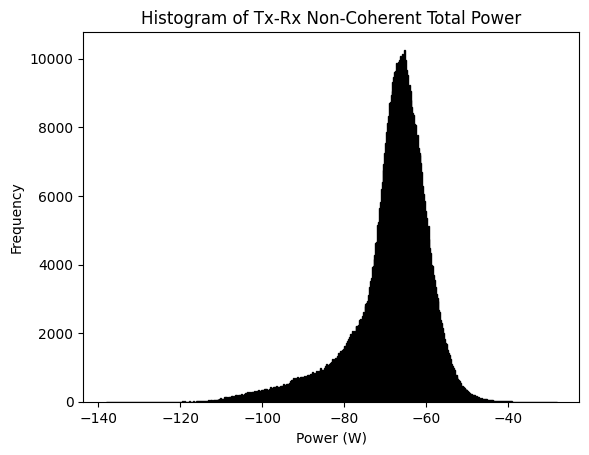

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# log_all_power = np.log1p(all_power)
# max = np.max(log_all_power)
# min = np.min(log_all_power)
filter_power = all_power[all_power != 0]
filter_power = 10 * np.log10(filter_power / 0.001)
print(filter_power)

print(filter_power)

max = np.max(filter_power)
min = np.min(filter_power)
print(min)
print(max)

# Create histogram
plt.hist(filter_power, bins=500, range=[min, max], edgecolor='black')#,  log=True)

# Add labels and title
plt.xlabel('Power (W)')
plt.ylabel('Frequency')
plt.title('Histogram of Tx-Rx Non-Coherent Total Power')

# Show the plot
plt.show()